# Mobile Money Fraud Transaction Detection System

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [44]:
df = pd.read_csv('mobile_money_transactions.csv')
df.head()

,transaction_id,user_id,transaction_type,amount,device_id,location,timestamp,channel,agent_id,sim_swap_flag,balance_before,balance_after,transaction_velocity
0,T000000,U0874,receive,5157.60,D082,Yaba,2024-03-25 16:38:00,USSD,A035,0,77090.73,71933.13000,0
1,T000001,U0460,receive,2501.95,D196,Ajah,2024-04-11 23:47:00,USSD,A069,0,25595.31,23093.36000,1
2,T000002,U0253,send,3727.93,D180,Ikeja,2024-04-01 14:52:00,USSD,A194,0,68411.20,64683.27000,4
3,T000003,U0526,receive,4044.79,D096,Owerri,2024-03-13 00:14:00,USSD,A297,0,13859.25,9814.46000,0
4,T000004,U0752,receive,2523.75,D175,Yaba,2024-06-28 23:38:00,Agent,A050,0,2497.58,481.97505,2


## Performing EDA

In [45]:
for col in df.columns:
    print(df[col].value_counts())

transaction_id
T009983    1
T009982    1
T009981    1
T009980    1
T009979    1
          ..
T000004    1
T000003    1
T000002    1
T000001    1
T000000    1
Name: count, Length: 10000, dtype: int64
user_id
U0464    24
U0560    21
U0849    20
U0221    20
U0640    19
         ..
U0829     3
U0190     3
U0904     3
U0287     3
U0185     3
Name: count, Length: 1000, dtype: int64
transaction_type
send        3542
receive     3514
cash_out    1492
cash_in     1452
Name: count, dtype: int64
amount
1952.28    2
94.02      2
2952.60    2
5627.95    2
4095.85    2
          ..
1017.83    1
2930.10    1
2652.99    1
246.28     1
3117.12    1
Name: count, Length: 9946, dtype: int64
device_id
D186    74
D134    66
D045    66
D071    63
D004    63
        ..
D148    37
D137    36
D040    33
D049    32
D054    29
Name: count, Length: 200, dtype: int64
location
Ikeja          1267
Owerri         1266
Aba            1265
Makurdi        1261
Yaba           1246
Portharcout    1238
Ajah           1235
K

In [46]:
#checking for missing values
df.isnull().sum()

transaction_id          0
user_id                 0
transaction_type        0
amount                  0
device_id               0
location                0
timestamp               0
channel                 0
agent_id                0
sim_swap_flag           0
balance_before          0
balance_after           0
transaction_velocity    0
dtype: int64

In [47]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [48]:
#dropping the following columns: transaction_id	user_id
df.drop(columns=['transaction_id','user_id','agent_id','device_id'], inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_type      10000 non-null  object 
 1   amount                10000 non-null  float64
 2   location              10000 non-null  object 
 3   timestamp             10000 non-null  object 
 4   channel               10000 non-null  object 
 5   sim_swap_flag         10000 non-null  int64  
 6   balance_before        10000 non-null  float64
 7   balance_after         10000 non-null  float64
 8   transaction_velocity  10000 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 703.3+ KB


In [50]:
#changing the timestamp column to datetime datatype
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [51]:
df

,transaction_type,amount,location,timestamp,channel,sim_swap_flag,balance_before,balance_after,transaction_velocity
0,receive,5157.60,Yaba,2024-03-25 16:38:00,USSD,0,77090.73,71933.13000,0
1,receive,2501.95,Ajah,2024-04-11 23:47:00,USSD,0,25595.31,23093.36000,1
2,send,3727.93,Ikeja,2024-04-01 14:52:00,USSD,0,68411.20,64683.27000,4
3,receive,4044.79,Owerri,2024-03-13 00:14:00,USSD,0,13859.25,9814.46000,0
4,receive,2523.75,Yaba,2024-06-28 23:38:00,Agent,0,2497.58,481.97505,2
...,...,...,...,...,...,...,...,...,...
9995,receive,3214.51,Owerri,2024-06-26 22:11:00,App,0,81009.63,77795.12000,2
9996,cash_in,1375.08,Makurdi,2024-04-07 11:59:00,USSD,1,17085.68,15710.60000,2
9997,cash_out,8774.94,Ikeja,2024-05-20 02:15:00,USSD,0,55531.93,46756.99000,0
9998,cash_out,15885.43,Ikeja,2024-01-17 04:51:00,USSD,0,18953.09,3067.66000,2


In [52]:
# Derive time-based features
df["hour_of_day"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_type      10000 non-null  object        
 1   amount                10000 non-null  float64       
 2   location              10000 non-null  object        
 3   timestamp             10000 non-null  datetime64[ns]
 4   channel               10000 non-null  object        
 5   sim_swap_flag         10000 non-null  int64         
 6   balance_before        10000 non-null  float64       
 7   balance_after         10000 non-null  float64       
 8   transaction_velocity  10000 non-null  int64         
 9   hour_of_day           10000 non-null  int32         
 10  day_of_week           10000 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(3)
memory usage: 781.4+ KB


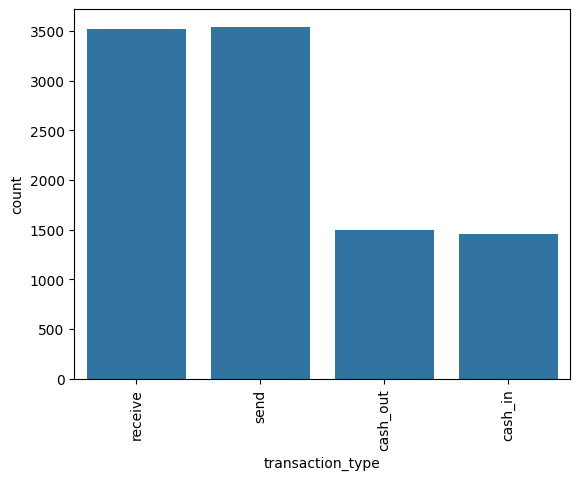

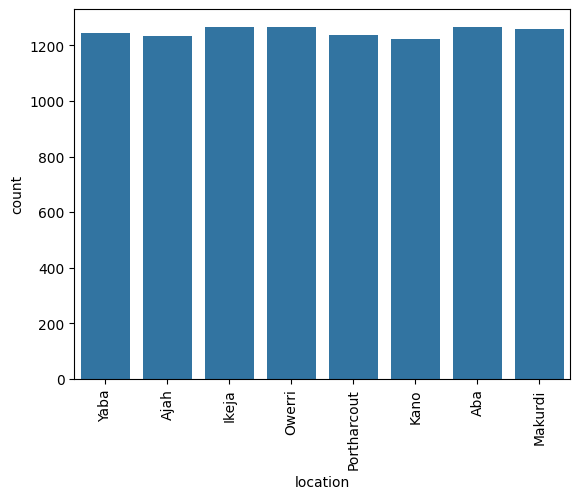

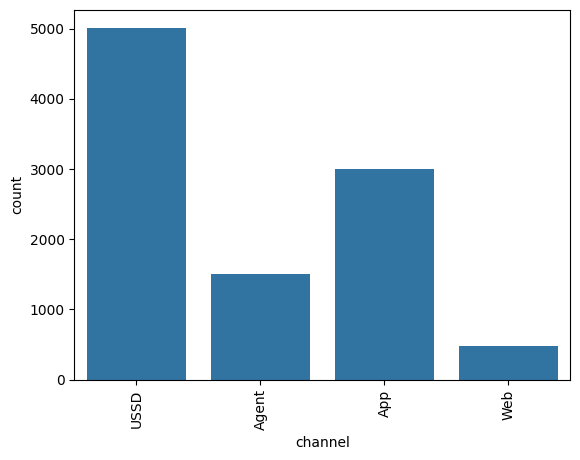

In [54]:
#visualizing the categorical variables
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.show()

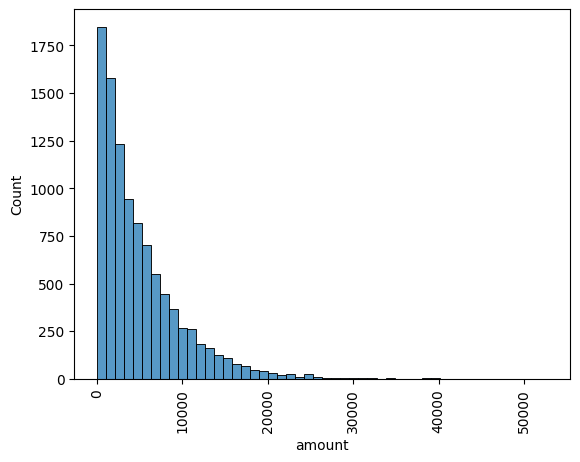

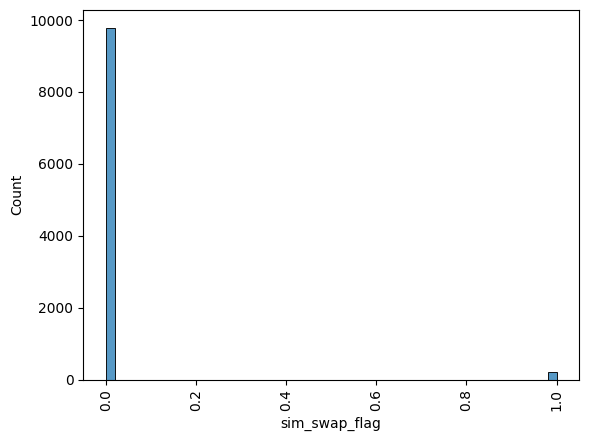

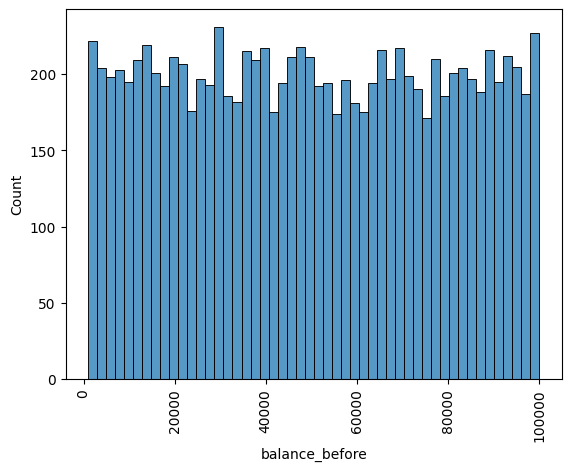

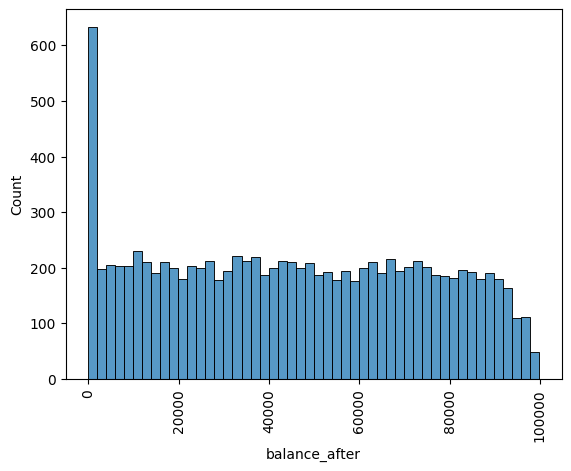

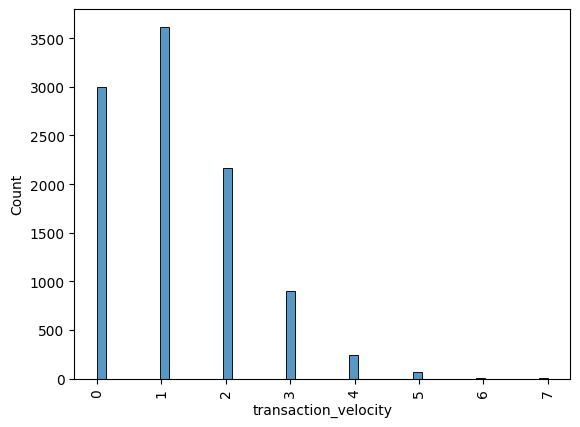

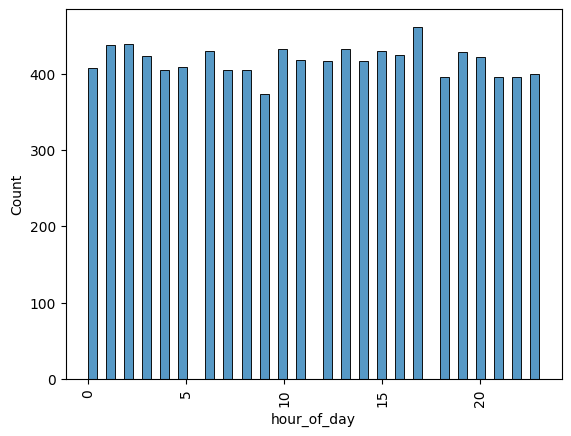

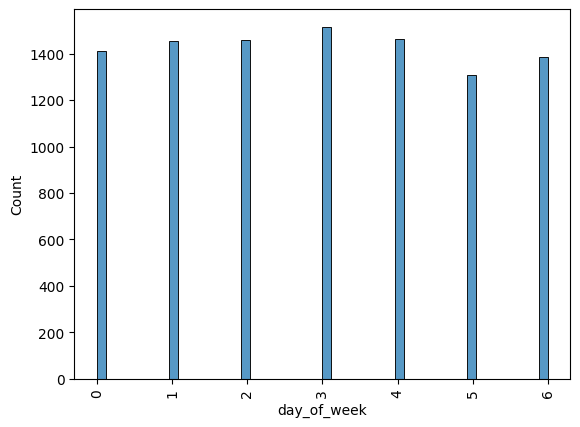

In [55]:
#visualizing the numerical variables
for col in df.select_dtypes(include=['float','int']).columns:
    sns.histplot(data=df[col], bins=50)
    plt.xticks(rotation=90)
    plt.show()

In [56]:
#Encoding the hour of day and the day of week feature to capture real life time and day instead of it numerical value
df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)


In [57]:
df.head()

,transaction_type,amount,location,timestamp,channel,sim_swap_flag,balance_before,balance_after,transaction_velocity,hour_of_day,day_of_week,hour_sin,hour_cos,day_sin,day_cos
0,receive,5157.60,Yaba,2024-03-25 16:38:00,USSD,0,77090.73,71933.13000,0,16,0,-0.866025,-0.500000,0.000000,1.000000
1,receive,2501.95,Ajah,2024-04-11 23:47:00,USSD,0,25595.31,23093.36000,1,23,3,-0.258819,0.965926,0.433884,-0.900969
2,send,3727.93,Ikeja,2024-04-01 14:52:00,USSD,0,68411.20,64683.27000,4,14,0,-0.500000,-0.866025,0.000000,1.000000
3,receive,4044.79,Owerri,2024-03-13 00:14:00,USSD,0,13859.25,9814.46000,0,0,2,0.000000,1.000000,0.974928,-0.222521
4,receive,2523.75,Yaba,2024-06-28 23:38:00,Agent,0,2497.58,481.97505,2,23,4,-0.258819,0.965926,-0.433884,-0.900969


### Preprocessing 

In [58]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature scaling
scaler = StandardScaler()
for col in df.select_dtypes(exclude=['object','datetime64[ns]']):
    df[col] = scaler.fit_transform(df[[col]])

In [59]:


# Encode categorical features (e.g., transaction_type, location)
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = label_encoder.fit_transform(df[col])

In [60]:
df.head()

,transaction_type,amount,location,timestamp,channel,sim_swap_flag,balance_before,balance_after,transaction_velocity,hour_of_day,day_of_week,hour_sin,hour_cos,day_sin,day_cos
0,2,0.020676,7,2024-03-25 16:38:00,2,-0.146816,0.929557,0.917380,-1.100913,0.657488,-1.497673,-1.216904,-0.702729,-0.032085,1.420749
1,2,-0.510297,1,2024-04-11 23:47:00,2,-0.146816,-0.858107,-0.777357,-0.183868,1.671191,0.018651,-0.358201,1.370526,0.586282,-1.248925
2,3,-0.265173,2,2024-04-01 14:52:00,2,-0.146816,0.628247,0.665810,2.567269,0.367858,-1.497673,-0.699275,-1.220398,-0.032085,1.420749
3,2,-0.201820,5,2024-03-13 00:14:00,2,-0.146816,-1.265525,-1.238134,-1.100913,-1.659548,-0.486791,0.007818,1.418717,1.357373,-0.296129
4,2,-0.505938,7,2024-06-28 23:38:00,0,-0.146816,-1.659946,-1.561970,0.733178,1.671191,0.524092,-0.358201,1.370526,-0.650452,-1.248925


In [ ]:
from sklearn.ensemble import IsolationForest

# Select relevant features for anomaly detection
features = ['amount', 'balance_before', 'balance_after', 
            'hour_sin','hour_cos','day_sin','day_cos', 'transaction_velocity']

X = df[features]

In [ ]:
# Train the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(X)

# Predict anomalies (-1 for fraud, 1 for normal)
df_cleaned['anomaly_score'] = model.decision_function(X)
df_cleaned['is_anomaly'] = model.predict(X)

# Convert -1 (anomaly) to True, 1 (normal) to False
df_cleaned['is_anomaly'] = df_cleaned['is_anomaly'].map({-1: True, 1: False})

In [ ]:
#selecting features for anomaly detection
#day_of_week, balance_after, amount, balance_before, hour_sin, hour_cos, day_cos, day_sin, transaction_velocity